# EDA & Sentiment Analysis of SBI Rewardz App Reviews

## Aim:
Sentiment Analysis of Google Play App Reviews using Vader sentiment and Textblob. Also, perform Exploratory Data Analysis and Data Visualization to get various trends and different useful insights from a SBI Rewardz App reviews dataset.

The dataset being used contains reviews from rewards App of SBI from Jan'19 to March'21.

## What I plan to do:
### 1- Text Preprocessing
### 2- Exploratory data analysis
### 3- Sentiment Analysis using Vader
### 4- Results through Visualization

### Load Required Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords 
from textblob import TextBlob
from textblob import Word

#Importing Seaborn and Matplotlib for graphical effects.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud
import string

[nltk_data] Downloading package wordnet to C:\Users\Rishika
[nltk_data]     Vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rishika
[nltk_data]     Vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rishika
[nltk_data]     Vaish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Read the CSV file:

In [2]:
df = pd.read_csv('sbi_reviews_final.csv')
df.head()

,_id,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,app_name,app_id,date,time
0,60a174e4cdf1a528452fa2e2,gp:AOqpTOGN57cODta_3WKZgLKQxl2yLTgyMrbcdMPZdcJ...,Sky-Net Asansol,https://play-lh.googleusercontent.com/a-/AOh14...,Nice,5,0,6.3.8,NaN,SBI,com.freedomrewardz,2021-03-31,22:45:01
1,60a174e4cdf1a528452fa2e3,gp:AOqpTOGJh8zPGLs-0AhXcaTEoT3_or9rQ0BuMj3VsTg...,070_Rahul Ray,https://play-lh.googleusercontent.com/a-/AOh14...,Very nicely built,5,0,NaN,NaN,SBI,com.freedomrewardz,2021-03-31,18:48:47
2,60a174e4cdf1a528452fa2e4,gp:AOqpTOE9tvDUqQXODkOf6JhY-H5GMUghaYs0V8bmc6C...,Sunil Singhal,https://play-lh.googleusercontent.com/a/AATXAJ...,The app not working properly,1,0,6.3.8,NaN,SBI,com.freedomrewardz,2021-03-31,17:49:58
3,60a174e4cdf1a528452fa2e5,gp:AOqpTOFTJOZNa8h46NsuyX73K-fV7AFh8wqx_1AM5qF...,Gaurav Hegde,https://play-lh.googleusercontent.com/a-/AOh14...,SBI rewardz is a scam run by SBI. You just can...,1,0,6.3.8,NaN,SBI,com.freedomrewardz,2021-03-31,17:13:28
4,60a174e4cdf1a528452fa2e6,gp:AOqpTOFKz0bYEp1sdM7ylsCfgtAUl_tkrD0NXeNX2GV...,Akbar Bapu,https://play-lh.googleusercontent.com/a-/AOh14...,Iam Happy,5,0,6.3.8,NaN,SBI,com.freedomrewardz,2021-03-31,14:32:00


### Observing the shape of our data frame

In [3]:
df.shape

(37850, 13)

### Observing the lables of each column

In [4]:
print(df.keys())

Index(['_id', 'reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'app_name',
       'app_id', 'date', 'time'],
      dtype='object')


In [5]:
#df.info()

In [6]:
#df.describe()

# 1) Text Preprocessing

For Text Preprocessing we will use TextBlob Library.TextBlob is built upon NLTK and provides an easy to use interface to the NLTK library.

Stopwords removal does not yield better results because VADER uses words such as 'but' in calculating the compound score.

### Therefore, we won't be removing stopwords from the text!

#### Lower casing:

In [7]:
df['content'] = df['content'].str.lower()
df.content.head()

0                                                 nice
1                                    very nicely built
2                         the app not working properly
3    sbi rewardz is a scam run by sbi. you just can...
4                                            iam happy
Name: content, dtype: object

#### Removing punctuations:

In [8]:
df['content'] = df['content'].str.lower()
df.content.head()

0                                                 nice
1                                    very nicely built
2                         the app not working properly
3    sbi rewardz is a scam run by sbi. you just can...
4                                            iam happy
Name: content, dtype: object

#### Lemmatization:

In [9]:
#Lemmatization
df['content'] = df['content'].apply(lambda x: " ".join([Word(word).
lemmatize() for word in x.split()]))
df.content.head()

0                                                 nice
1                                    very nicely built
2                         the app not working properly
3    sbi rewardz is a scam run by sbi. you just can...
4                                            iam happy
Name: content, dtype: object

# 2) Exploratory Data Analysis:

## a) Number of reviews for each score:

Let’s have a look at the distribution of the ratings of the data frame.

In [10]:
#Lets do the value count on 'scores'.
df.score.value_counts()

5    24634
1     5936
4     5121
3     1362
2      797
Name: score, dtype: int64

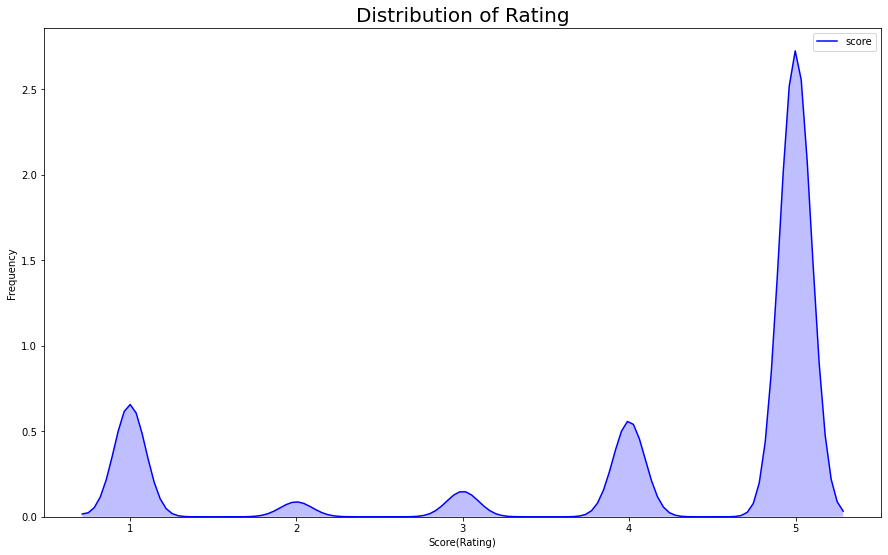

In [11]:
plt.figure(figsize=(15,9))
plt.xlabel("Score(Rating)")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.score, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);

- We can see that 5-star reviews constitute a large proportion (65%) of all reviews. The next most prevalent rating is 1-star(15.6%), followed by 4-star, 3-star, and finally 2-star reviews.
- This shows most of the people liked the app and gave 5-star rating. 

## Word Count for each score:

In [12]:
df["text_word_count"] = df["content"].apply(lambda text: len(text.split()))
#temp_df.head()

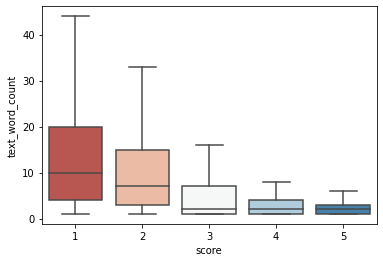

In [13]:
sns.boxplot(x='score',y='text_word_count', data=df, palette='RdBu', showfliers=False)
plt.show()

Observations:
- 4,5-star reviews had the lowest median word count (2 words), while 1-star reviews had the largest median word count (9 words).
- This shows that the users who wrote negative reviews used more words i.e. wrote longer reviews than the users who wrote positive reviews.

## Reviews per year:

In [14]:
df['year'] = pd.DatetimeIndex(df['date']).year
#df.head()

In [15]:
df.year.value_counts()

2019    31793
2020     5189
2021      868
Name: year, dtype: int64

Number of reviews for 2021 are very less as we have data only till march'21.

## Quarter on Quarter Analysis:

### Dividing the dataframe into Quarters:

In [16]:
df1 = df[df['year'] == 2019]
df1.date = pd.to_datetime(df1.date)
df1['quarter'] = pd.PeriodIndex(df1.date, freq='Q')
df1 = df1.sort_values(by = 'quarter')
#df1.head()
#len(df1)

df2 = df[df['year'] == 2020]
df2.date = pd.to_datetime(df2.date)
df2['quarter'] = pd.PeriodIndex(df2.date, freq='Q')
df2 = df2.sort_values(by = 'quarter')
#df2.head(2)
#len(df2)

df3 = df[df['year'] == 2021]
df3.date = pd.to_datetime(df3.date)
df3['quarter'] = pd.PeriodIndex(df3.date, freq='Q')
#df3.head(2)
#len(df3)

#combining the three dataframes
frames = [df1, df2, df3]
result_df = pd.concat(frames)
#result_df.head()
print(len(result_df))

37850


C:\Users\Rishika Vaish\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-16-bf733f8d3f4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['quarter'] = pd.PeriodIndex(df1.date, freq='Q')
<ipython-input-16-bf733f8d3f4a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

### Reviews per Quarter:

In [17]:
result_df.quarter.value_counts()

2019Q2    8723
2019Q3    8286
2019Q1    7629
2019Q4    7155
2020Q1    2140
2020Q2    1236
2020Q3     958
2021Q1     868
2020Q4     855
Freq: Q-DEC, Name: quarter, dtype: int64

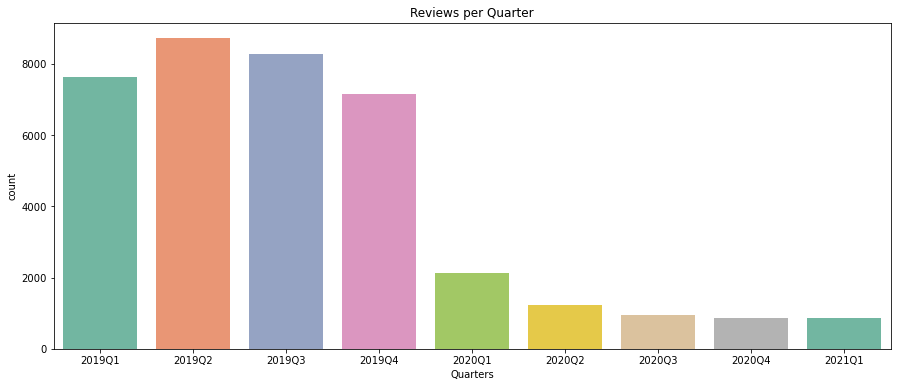

In [18]:
plt.figure(figsize=(15, 6))

sns.countplot(x='quarter', data=result_df, palette="Set2")
plt.xlabel('Quarters')
plt.title('Reviews per Quarter')
plt.show()

It can be observed that the number of reviews have decreased by a significant amount since 2019.

### Average rating each quarter:

In [19]:
table = pd.pivot_table(data=result_df,index=['quarter'])
table.drop(['thumbsUpCount','year','text_word_count'], axis='columns', inplace=True)
table1 = table.reset_index()
table1

,quarter,score
0,2019Q1,4.234631
1,2019Q2,4.440903
2,2019Q3,4.322472
3,2019Q4,4.025297
4,2020Q1,3.291589
5,2020Q2,3.152913
6,2020Q3,3.185804
7,2020Q4,3.335673
8,2021Q1,3.184332


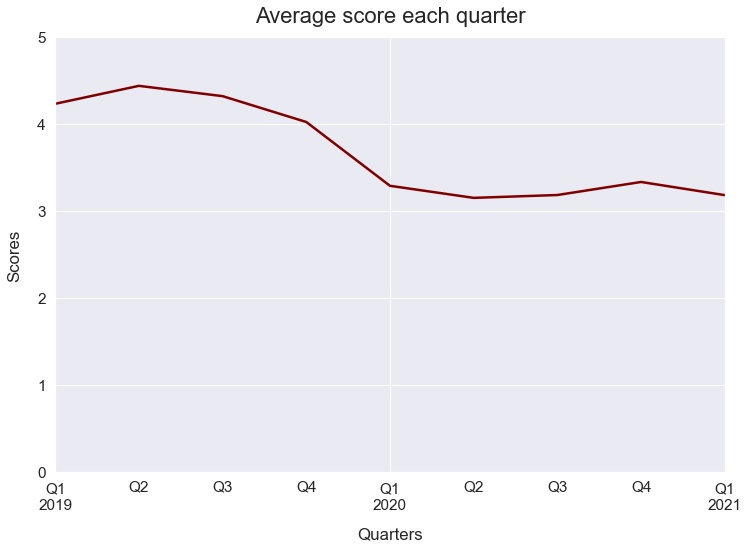

In [20]:
sns.set(font_scale=1.4)
table1.set_index('quarter')['score'].plot(figsize=(12, 8), linewidth=2.5, color='maroon')
plt.xlabel("Quarters", labelpad=15)
plt.ylabel("Scores", labelpad=15)
plt.ylim(0, 5)
plt.title("Average score each quarter", y=1.02, fontsize=22);

It can be observed that the average rating for each quarter is decreasing from 2019 to 2020 and then, is almost constant from 2020 to 2021.

## Reviews per version:

#### Calculating the review count and version count for further analysis:

In [21]:
df['reviewCreatedVersion']=df['reviewCreatedVersion'].astype('str')
versions = np.array(df['reviewCreatedVersion'])
size = (len(df))
print('Review count: ' + str(size))
print('Versions count: ' + str(len(np.unique(versions, return_counts=False))))

Review count: 37850
Versions count: 40


Count of reviews per version:

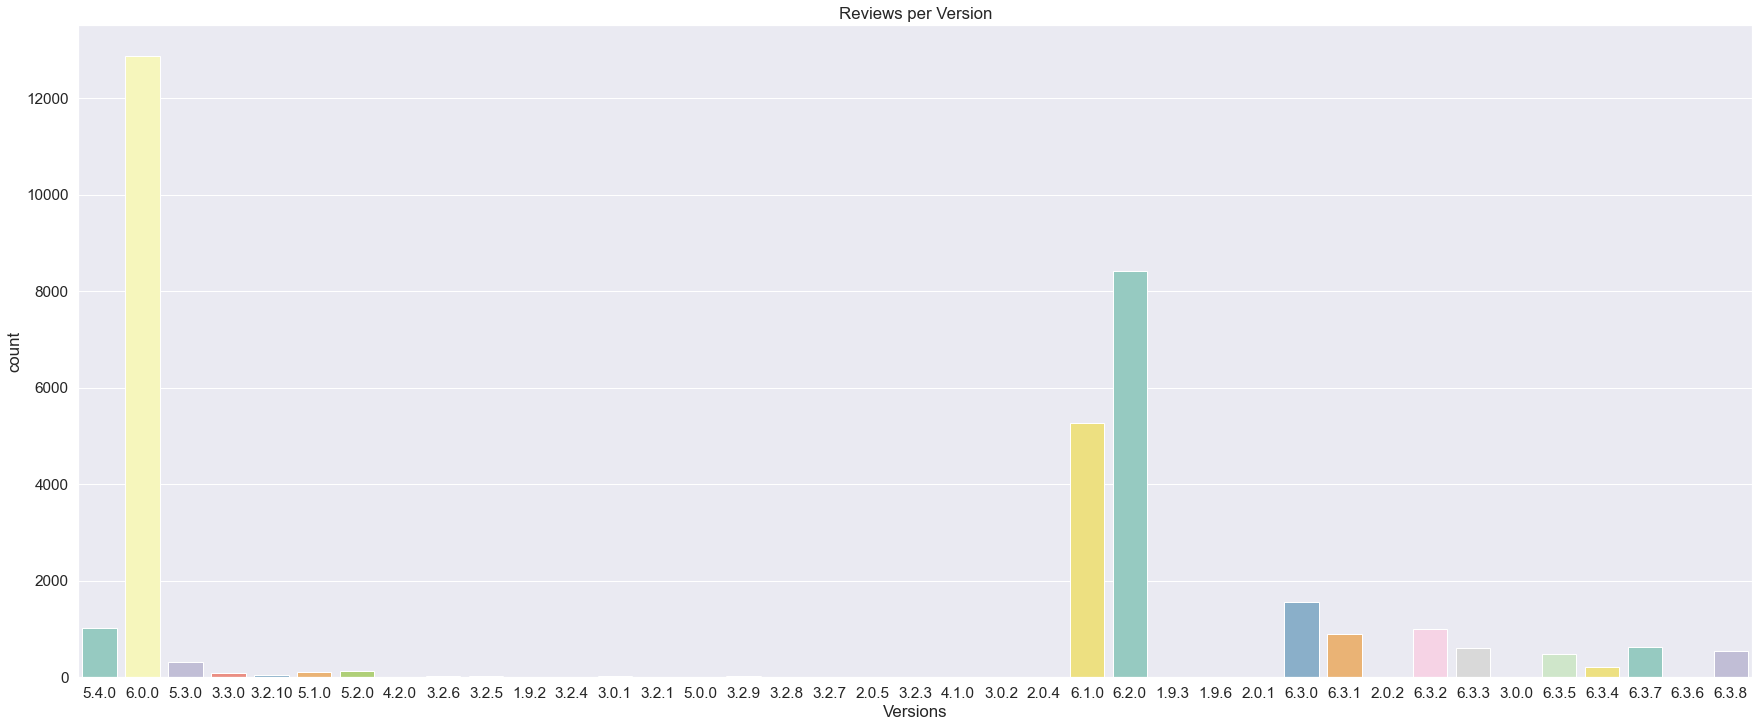

In [22]:
plt.figure(figsize=(30, 12))

sns.countplot(x='reviewCreatedVersion', data=result_df, palette="Set3")
plt.xlabel('Versions')
plt.title('Reviews per Version')
plt.show()

# Sentiment Analysis using Vader:
- Pretrained model takes the input from the text description and outputs the sentiment score ranging from -1 to +1 for each sentence

- VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER not only tells about the Positive and Negative score but also tells us about how positive or negative a sentiment is.

Some features of VADER:
- Emoticons (e.g. ! has value)
- Degree modifiers ('extremely good' vs 'sort of good')
- Shift in polarity due to but (e.g. I liked the app, but the speed was slow.)

#### Build function for getting the sentiments!

In [23]:
# Function for getting the sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#### Generating sentiment for all the sentence present in the dataset:

In [24]:
sentiment_comp=[]
for row in result_df['content']:
    
    vs=analyzer.polarity_scores(row)
    sentiment_comp.append(vs)
    
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(sentiment_comp)
df_sentiments.head()

,neg,neu,pos,compound
0,0.0,0.238,0.762,0.4927
1,0.0,1.000,0.000,0.0000
2,0.0,0.385,0.615,0.4927
3,0.0,0.376,0.624,0.7674
4,0.0,0.564,0.436,0.4754


In [25]:
# Merging the sentiments back to reviews dataframe
result_df = pd.concat([result_df.reset_index(drop=True), df_sentiments], axis=1)
#df_c.head(3)

In [26]:
percentage_comp = []

for i in result_df['compound']:
    if i > 0:
        percentage = i*100
    elif i < 0:
        percentage = -i*100
    else:
        percentage = " "
    percentage_comp.append(percentage)
    
result_df['percentage'] = percentage_comp
#result_df.head()

In [27]:
# Convert scores into positive, negetive and not defined sentiments using some threshold
result_df["Sentiment"] = result_df["compound"].apply(lambda compound: "positive" if compound > 0 else \
                                              ("negative" if compound < 0 else "not defined"))
result_df.drop(['neg','neu','pos'], axis='columns', inplace=True)
result_df.head()

,_id,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,replyContent,app_name,app_id,date,time,text_word_count,year,quarter,compound,percentage,Sentiment
0,60a17655cdf1a528453036bb,gp:AOqpTOHsQlvUTXF_rhtTfZfu-Cm50Bjt7YArew8VMlf...,Chandan Naskar,https://play-lh.googleusercontent.com/a-/AOh14...,very useful,5,0,5.4.0,NaN,SBI,com.freedomrewardz,2019-01-02,00:48:33,2,2019,2019Q1,0.4927,49.27,positive
1,60a17655cdf1a528453022d5,gp:AOqpTOGPZaVknoZt8jErxK79KpiqDcZzzA8KngRxmqq...,Lakshminarayanan B,https://play-lh.googleusercontent.com/a-/AOh14...,very usefull app,5,0,6.0.0,NaN,SBI,com.freedomrewardz,2019-03-08,10:28:27,3,2019,2019Q1,0.0000,,not defined
2,60a17655cdf1a528453022d6,gp:AOqpTOFS5yb6m4eUK9266txgv8rR5ZtaEsinDVFosh4...,Jatinder Singh,https://play-lh.googleusercontent.com/a-/AOh14...,very good app,4,0,NaN,NaN,SBI,com.freedomrewardz,2019-03-08,10:23:40,3,2019,2019Q1,0.4927,49.27,positive
3,60a17655cdf1a528453022d7,gp:AOqpTOE8UAyE5u3LPAGe-r3usz5OpTTDC18nR9susUz...,LEARN WITH JEETENDRA MISHRA,https://play-lh.googleusercontent.com/a-/AOh14...,very very good and easy app,5,0,5.3.0,NaN,SBI,com.freedomrewardz,2019-03-08,10:00:24,6,2019,2019Q1,0.7674,76.74,positive
4,60a17655cdf1a528453022d8,gp:AOqpTOGyrx4ZqRx0rjV2Fl2T__3UFQbu10cpPFnqDAT...,himanshu verma,https://play-lh.googleusercontent.com/a-/AOh14...,very nice app by sbi,5,0,3.3.0,NaN,SBI,com.freedomrewardz,2019-03-08,09:52:24,5,2019,2019Q1,0.4754,47.54,positive


# Results:

## How many positive, negative and neutral sentiments?

In [30]:
result=result_df['Sentiment'].value_counts()
result

positive       28772
not defined     4959
negative        4119
Name: Sentiment, dtype: int64

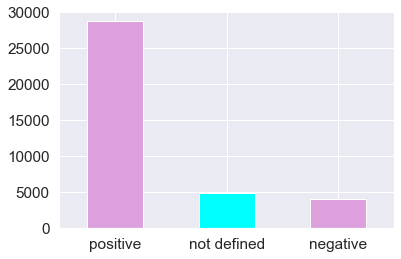

In [31]:
result.plot(kind='bar', rot=0, color=['plum','cyan']);

It can be seen that, positive reviews are much more than the negative reviews!

## Build wordcloud:

In [32]:
#calculating sentiments
reviews = np.array(result_df['content'])
size = (len(result_df))

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
pos_reviews = ''
neg_reviews = ''
concat_reviews = ''
score_arr = []
for i in range(size):
    sentence = reviews[i]
    concat_reviews += ' %s' % sentence
    vs = analyzer.polarity_scores(sentence)
    if vs.get('compound') >= 0:
        pos_reviews += ' %s' % sentence
    else:
        neg_reviews += ' %s' % sentence
    score_arr.append(vs.get('compound'))

Generate wordcloud for negative words:

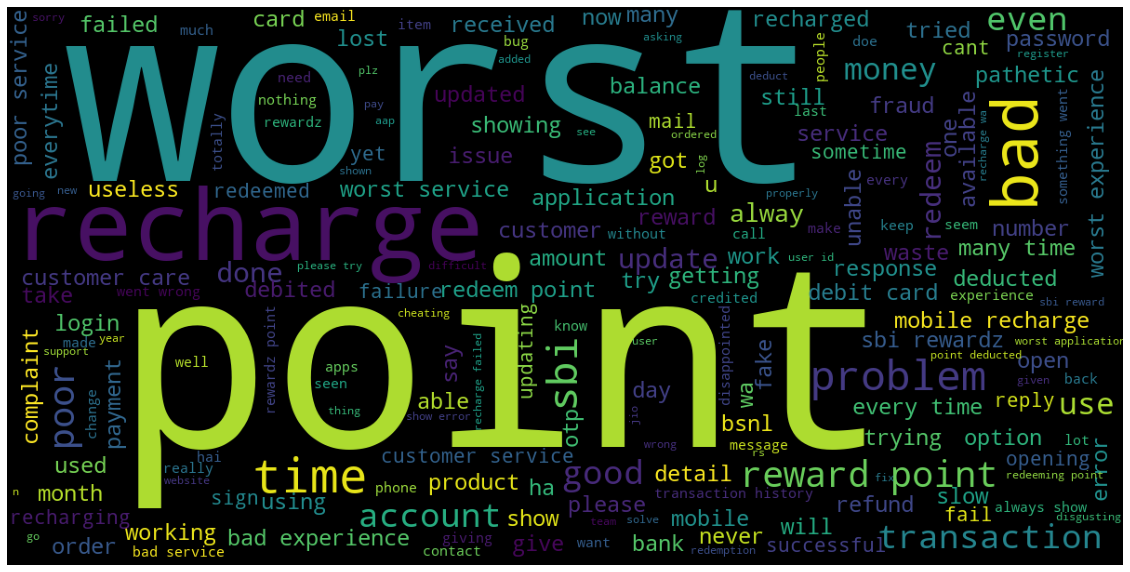

In [33]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('app')

def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(relative_scaling = 1.0,
                          scale=3,
                          stopwords = stopwords
                          ).generate(text)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(neg_reviews)

- Here, observe the words 'point', 'reward point', 'recharge', 'mobile' and 'transaction'. This means that the users who did not like the app faced problems with recharge, mobile recharge, transactions, reward points or redeem points.

Generate wordcloud for positive reviews:

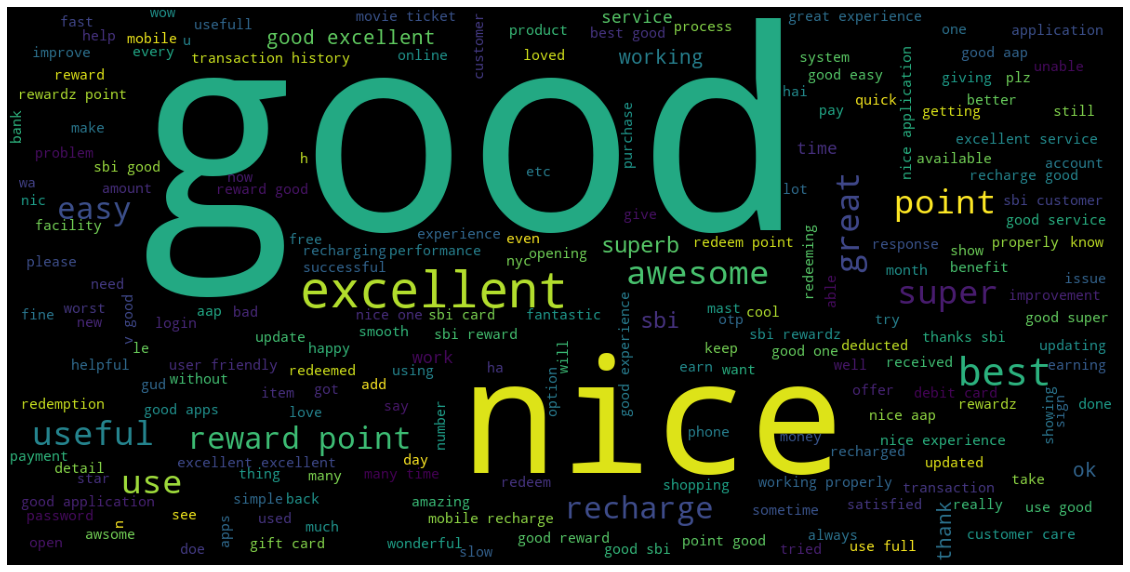

In [34]:
generate_wordcloud(pos_reviews)

- We can see that users who liked the App mostly used words like 'good', 'nice', 'excellent', etc.

- Also, observe the words 'recharge', 'point' and 'reward point'. This means users who liked the app were happy when they did a recharge and were also happy with the reward points.

## Build Bigrams:
Created a function to obtain the most frequent words and the counts of words.

In [35]:
# based on the rating score, the data was split into three parts
neg_reviews =result_df[result_df.compound<0]['content']
pos_reviews = result_df[result_df.compound>=0]['content']

# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# apply function above 
common_words_good = get_top_n_bigram(pos_reviews, 30)
common_words_bad= get_top_n_bigram(neg_reviews, 30)

In [36]:
common_words_good[:5]

[('good app', 1855),
 ('nice app', 1658),
 ('reward point', 636),
 ('best app', 404),
 ('easy use', 324)]

In [37]:
common_words_bad[:5]

[('worst app', 506),
 ('reward point', 218),
 ('bad app', 123),
 ('bad experience', 120),
 ('redeem point', 105)]

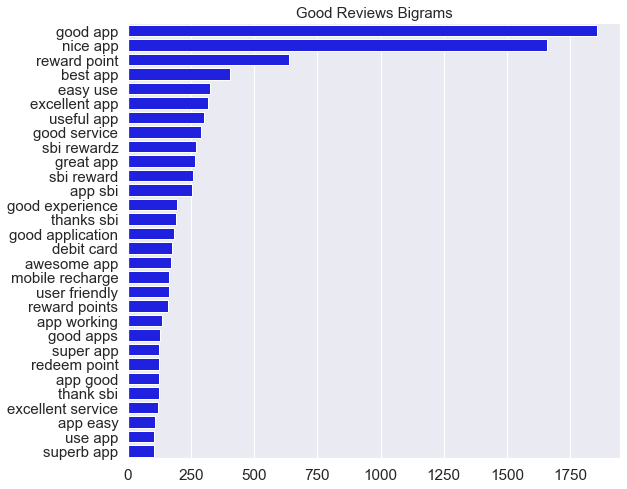

In [38]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(y,x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)
    
# bigram plot using function above
plt.figure(figsize=(30,8))
# good reviews bigrams
plt.subplot(1,3,1)
n_gram_plot(common_words_good,'Good','blue')

- The top 5 words in Good Review Bigrams are 'good app','nice app','useful app','easy use','good service'. Those words are very positive and the customers very enjoyed their products.
- Also, observe words like 'reward point', 'debit card' and 'mobile recharge'. This shows people who liked the app were happy with reward points, debit card transactions and mobile recharge.

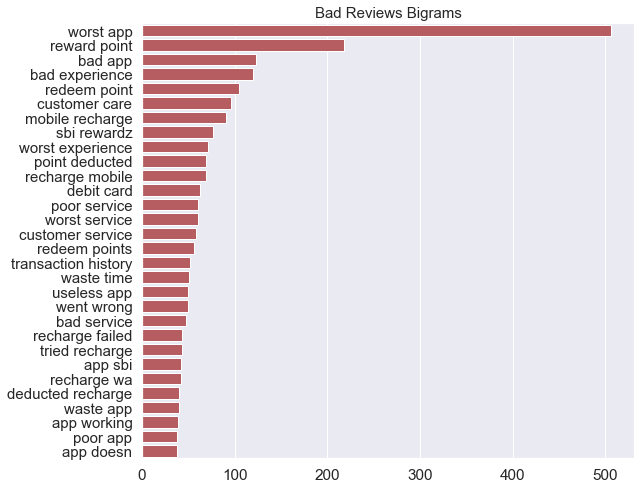

In [39]:
plt.figure(figsize=(30,8))
#bad reviews bigrams
plt.subplot(1,3,3)
n_gram_plot(common_words_bad,'Bad','r')
plt.show()

- On the other hand, more negative words are in Bad Review Bigrams such as “worst app”, "bad experience" and “poor service”. We also can see some keywords like “reward points”, "redeem pooint", "mobile recharge", "customer care", which implies that the reason why those customers gave low rating score was because the customers faced problems in mobile recharge, reward points and experienced bad customer service.

## Thumbsup count and word count for positive , negative and neutral reviews: 

Made a pivottable, keeping Sentiment as the index.

In [40]:
table = pd.pivot_table(data=result_df,index=['Sentiment'])
table.drop(['year', 'score', 'compound'], axis='columns', inplace=True)
table

,text_word_count,thumbsUpCount
Sentiment,,
negative,15.186696,1.378733
not defined,4.801775,0.053438
positive,4.084527,0.158696


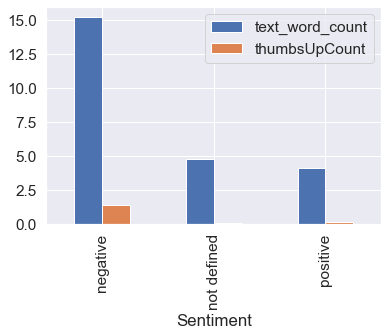

In [41]:
table.plot(kind='bar');

- We can observe that the average word count for negative reviews is more than that for the positive and neutral reviews.
- Also, the average thumbs-up count is slightly more for the negative reviews. 

## Positive, Negative and neutral reviews for each quarter:

In [42]:
result_df.groupby(["Sentiment","quarter"]).size()

Sentiment    quarter
negative     2019Q1      683
             2019Q2      580
             2019Q3      614
             2019Q4      814
             2020Q1      449
             2020Q2      343
             2020Q3      242
             2020Q4      208
             2021Q1      186
not defined  2019Q1      959
             2019Q2      978
             2019Q3      987
             2019Q4      986
             2020Q1      405
             2020Q2      186
             2020Q3      162
             2020Q4      136
             2021Q1      160
positive     2019Q1     5987
             2019Q2     7165
             2019Q3     6685
             2019Q4     5355
             2020Q1     1286
             2020Q2      707
             2020Q3      554
             2020Q4      511
             2021Q1      522
dtype: int64

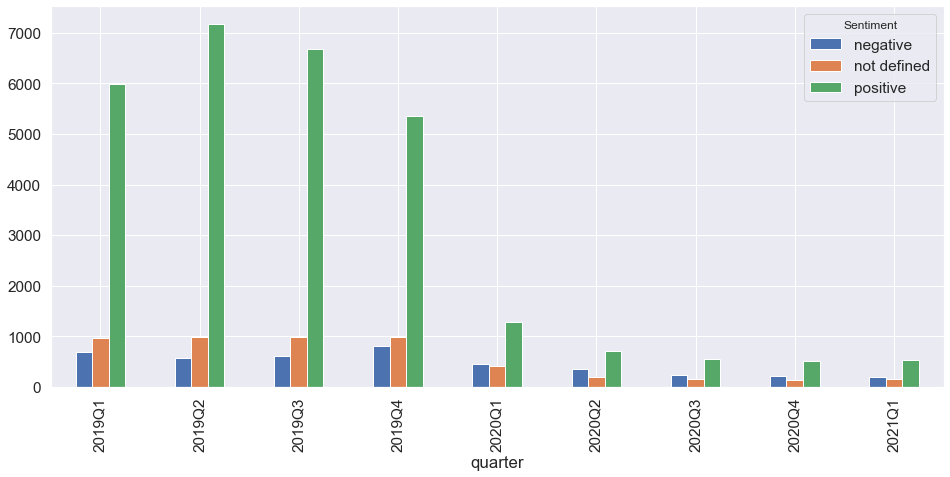

In [43]:
ax = result_df.groupby('Sentiment').quarter.value_counts().unstack(0).plot.bar()
fig = ax.get_figure()
fig.set_size_inches(16, 7)

- In 2019, the total number of reviews are much more than that in 2020 and 2021. And, the number of positive reviews are way more.
- From 2020, the amount of positive and negative reviews are almost constant till 2021.

# Conclusion:

Let’s recap all the steps!

- I started off by installing the necessary modules via pip install and loaded the CSV file for analysis.
- Then, I performed some text preprocessing techniques to clean the data and did some basic exploratory data analysis.
- After that, I moved on to implement my own code to calculate the sentiments score of the user reviews by using just the compound score calculated by VADER.
- Finally, found several results and insights using various visualisation techniques.